In [146]:
!pip install librosa


In [147]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio


In [148]:
import pandas as pd

download_path = '../vocal_patterns/data'
metadata_file = f"{download_path}/dataset_tags.csv"

df = pd.read_csv(metadata_file)
df.head()


path exercise technique  \
0  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other   vibrato   
1  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other   vibrato   
2  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other   vibrato   
3  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other  straight   
4  /Users/elsagregoire/code/ElsaGregoire/vocal_pa...    Other  straight   

               filename  
0    m6_row_vibrato.wav  
1   m6_caro_vibrato.wav  
2   m6_dona_vibrato.wav  
3  m6_caro_straight.wav  
4   m6_row_straight.wav

In [149]:
audio_path = '/Users/elsagregoire/Desktop/Vocal Set Le Wagon/arpeggios/arpeggios f1/slow_forte/f1_arpeggios_c_slow_forte_a.wav'


### Load the audio file

In [150]:
y, sr = librosa.load(audio_path)


In [151]:
y #y is the data as numpy array
# which gives us the amplitude of the wave form at a certain moment


array([1.3526442e-04, 1.4985875e-04, 9.8155477e-05, ..., 4.6974109e-04,
       4.5185169e-04, 4.9337966e-04], dtype=float32)

In [152]:
y.shape  # 165853 / 22050 = 7,52 seconds long


(165853,)

In [153]:
sr # sr is the smpling rate


22050

In [154]:
Audio(data=y, rate=sr)


### Waveplot

### truncating the wav file 

In [155]:
start_sample = int(0.0 * sr)
end_sample = int(6.0 * sr)
truncated_signal = y[start_sample:end_sample]
len(truncated_signal)


132300

In [156]:
Audio(data=truncated_signal, rate=sr)


### Padding if too long (here tryout with 10 sec)

In [157]:
current_length = len(y)
current_length


165853

In [158]:
padding_both_sides = int((10.0 * sr - current_length) / 2)
padding_both_sides


27323

In [159]:
padded_signal = librosa.util.pad_center(y, size= (current_length + padding_both_sides * 2))
padded_signal


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [160]:
len(padded_signal)


220499

### Pitch shift

In [161]:
steps = float(3)
y_pitched_up=librosa.effects.pitch_shift(y, sr=sr, n_steps=steps)
Audio(data=y_pitched_up, rate=sr)


In [162]:
y_pitched_down = librosa.effects.pitch_shift(y, sr=sr, n_steps=-2)
Audio(data=y_pitched_down, rate=sr)


### Time stretch

In [163]:
faster_rate = 1.5
y_stretched_faster = librosa.effects.time_stretch(y, rate=faster_rate)
Audio(data=y_stretched_faster, rate=sr)


In [164]:
slower_rate = 0.5
y_stretched_slower = librosa.effects.time_stretch(y, rate=slower_rate)
Audio(data=y_stretched_slower, rate=sr)


### Add noise

In [165]:
noise_level = 0.005
np.random.normal(size=len(y))


array([ 0.2679083 ,  0.31539343, -0.41060553, ..., -1.16588549,
        0.2742019 , -0.11389599])

In [166]:
y_noisy = y + (noise_level * np.random.normal(size=len(y)))
Audio(data=y_noisy, rate=sr)


### mel spectrogram

In [167]:
# # Generate a spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=padded_signal, sr=sr)

# convert to decibels, logscale
# 2D NumPy array containing the intensity values at different frequencies and time points.
power_to_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# 128 frequency bins (vertical axis) and 431 time frames (horizontal axis).
# power_to_db represents as a grayscale image, not a color image!
# Each element in the matrix represents the intensity or magnitude of the signal at a specific frequency and time.
power_to_db.shape


(128, 431)

In [168]:
power_to_db


array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [169]:
min_value = np.min(power_to_db)
max_value = np.max(power_to_db)
print(max_value)
print(min_value)


0.0
-80.0


In [170]:
normalized_spectrogram = (power_to_db - min_value) / (max_value - min_value)
normalized_spectrogram


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

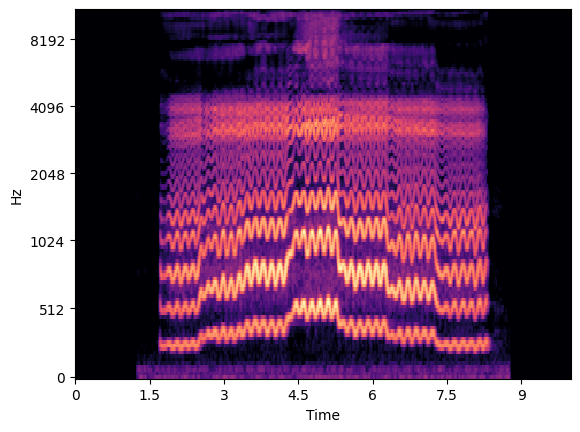

In [171]:
# display spectrogram
spectrogram_db = librosa.display.specshow(power_to_db, y_axis='mel', x_axis='time')


### FREQUENCY MASKING WITH NEW SPEC!

In [172]:
# this is the NEW original spectrogram I'm checking out for FREQUENCY masking
new_power_to_db = librosa.amplitude_to_db(np.abs(librosa.stft(padded_signal)), ref=np.max)
new_power_to_db


array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [173]:
# this is the old version of the original spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=padded_signal, sr=sr)
power_to_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
power_to_db


array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

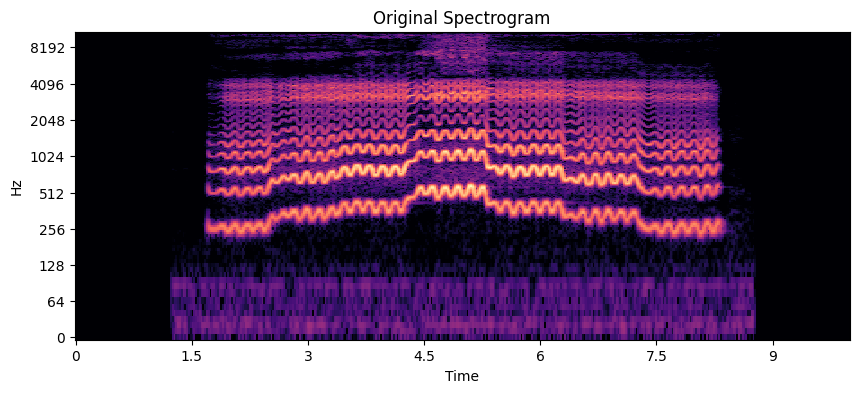

In [174]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(new_power_to_db, sr=sr, x_axis='time', y_axis='log')
plt.title('Original Spectrogram')
plt.show()


In [175]:
# The frequency masks
num_masks = 1
max_mask_width = 30

for i in range(num_masks):
    # Randomly choose the center frequency for the mask
    center_freq = np.random.randint(low=0, high=new_power_to_db.shape[0])
    # np.random.randint takes a random integer
    # between low=0 and high=the first int in the shape of the spectogram

    # Randomly choose the width of the mask
    mask_width = np.random.randint(1, max_mask_width)
    # random int between 1 and 10

    # Apply the frequency mask
    # Choose the frequency range to apply the mask
    start_freq = center_freq - mask_width // 2
    end_freq = center_freq + mask_width // 2

    # Apply the frequency mask by setting the selected range to 0.0
    new_power_to_db[start_freq:end_freq] = 0.0


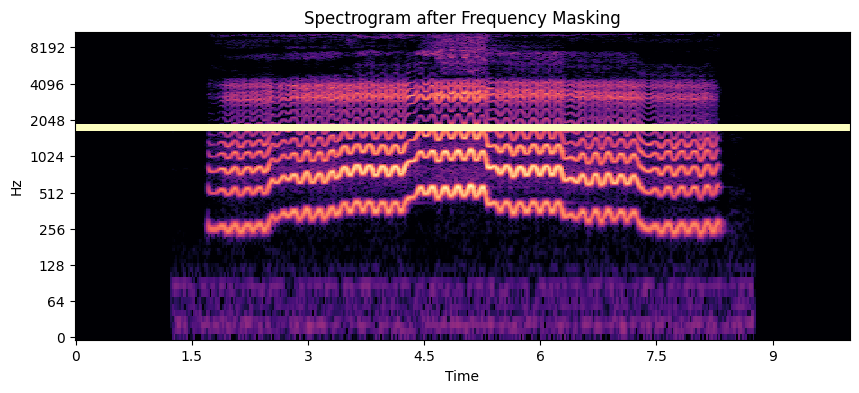

In [176]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(new_power_to_db, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram after Frequency Masking')

plt.show()


### FREQUENCY MQSKING OLD SPECTRO!

In [177]:
# The frequency masks
num_masks = 1
max_mask_width = 10

for i in range(num_masks):
    # Randomly choose the center frequency for the mask
    center_freq = np.random.randint(low=0, high=power_to_db.shape[0])
    # np.random.randint takes a random integer
    # between low=0 and high=the first int in the shape of the spectogram

    # Randomly choose the width of the mask
    mask_width = np.random.randint(1, max_mask_width)
    # random int between 1 and 10

    # Apply the frequency mask
    # Choose the frequency range to apply the mask
    start_freq = center_freq - mask_width // 2
    end_freq = center_freq + mask_width // 2

    # Apply the frequency mask by setting the selected range to 0.0
    power_to_db[start_freq:end_freq] = 0.0


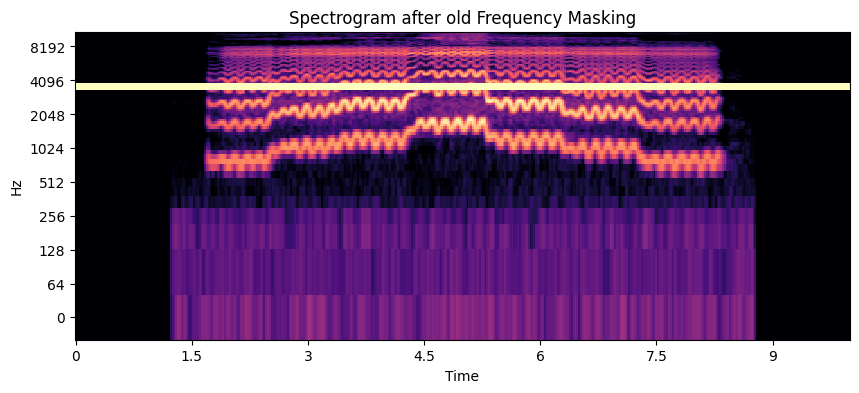

In [178]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram after old Frequency Masking')

plt.show()


### TIME MASKING OLD SPEC!

In [179]:
num_masks = 1
max_mask_width = 10


In [180]:
# This is the same as in frequency masking but we,re taking the vertical axis

for _ in range(num_masks):
    # Randomly choose the center time step for the mask
    center_time = np.random.randint(low=0, high=power_to_db.shape[1])

    # Randomly choose the width of the time mask
    mask_width = np.random.randint(1, max_mask_width)

    # Apply the time mask
    start_time = center_time - mask_width // 2 #47
    end_time = center_time + mask_width // 2   #53

    power_to_db[start_time:end_time] = 0.0
    #this takes a snippet between [47:53] and sets it to 0.0


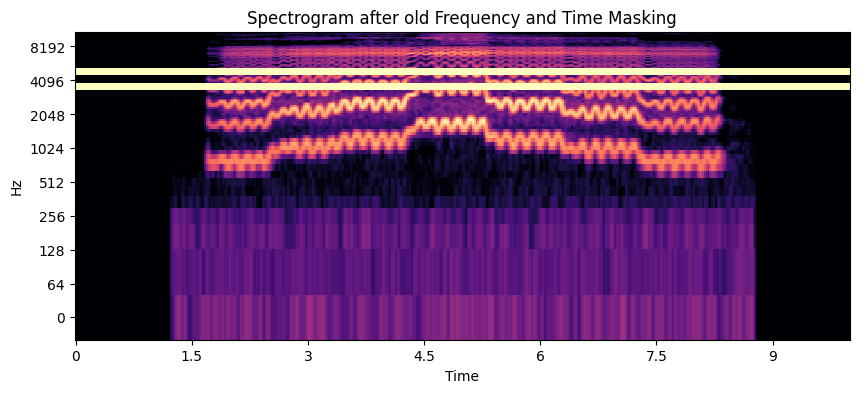

In [185]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram after old Frequency and Time Masking')

plt.show()
